# ITCS 4156 - Programming Assignment 2 - Classification

<font color="blue"> Joshua Vazquez</font>

**Note**: Doing *restart and run all* will execute all cells in this notebook without an error and should give you a minimum score of 32/80 by default.

## Instructions

For this programming assignment we will be experimenting with **three** classification algorithms to classify digits. We will be using a well known public dataset known as [MNIST](http://yann.lecun.com/exdb/mnist/).

The three classification algorithms are:

1. **Perceptron** Algorithm for Binary Classification
2. **Naive Bayes** for Multi-Class Classification
3. **Logistic Regression** for Multi-Class Classification

Compared to the programming assignment-1, this assignment gives you more freedom on how you approach the problem. You are just given the dataset and the analysis, pre-processing, training and prediction part is all left for you to do. Your model's accuracy will determine your score. The better the accuracy, the better the score.

For each classification model there are **four** class functions to implement. You can find them in the python files.

**1. fit_transform(X, Y)**  
This is where you do your pre-processing. X and Y here are your training input and training labels. Following are the examples of some general pre-processing steps:
 - Standardization/Normalization of data.
 - Feature selection and feature prunining. 
 - Feature transformation.
 - Data transformation (some logic to tranform your data before it is used for training).
The output of this function is the transformed input Xt. In the simplest case, Xt = X.

**2. transform(X)**  
This is called before making a prediction on X. Because, if you did some pre-processing in fit_transform method with the training data then you would want to apply the same transformation on your testing data X. 

**3. train(X,Y)**  
This is where you implement your algorithm. First step is to make a call to fit_transform(X,Y) and get the transformed data Xt. Then proceed to do training on Xt.

**4. predict(X)**  
This is where the classification happens. X here is your testing data now. You might want to transform X to Xt like you did in train method and then proceed with prediction. If the input X is of shape (N,M), then the output is strictly expected to be of shape (N,1). Basically, a prediction for each sample. Since, this is a digit classification task, each prediction should be a class number from list (0,1,2,3,4,5,6,7,8,9).

**Important Notes**
- The function of transform() method here is not strictly same as the transform method in regression. You are not just adding more degrees to your features. Here it means whatever you think is a necessary manupulation of data that is needed before it can be used for prediction.
- You are free to create your own class variables in __init__ method. Additionally, you can also define your own functions inside each class. For example if, I were to write a function to add bias feature then I would need to call it from fit_tranform and transform both. 
- Even though scikit-learn is available during evaluation, you should be implementing your own algorithms instead of using the library. This will be reviewed before the final grading. Please feel free to import any python, numpy, pandas modules. 
- For analysis, you can use any library you want in the notebook. However matplolib, seaborn etc will be unavailable in the evaluation environment if used in the python files.
- **Epochs (number of iterations of data)**: While training your models locally, you can kepp this number as high as you want. But please keep in mind, that for evaluation your job will have a maximum of **10 minutes** to finish training and prediction for all the three algorithms. So tune this parameter, keeping this information in mind.  
- **Plagiarism Detection**: While we encourage peer discussion for understanding concepts etc, code sharing is strictly prohibited. Therefore, a plagiarism detection software will analyze everyone's code to check for similarities.



In [5]:
# This ensures that whenever you make edits in your code files, your changes will get reflected 
# in this notebook as soon you run the cell which imports the method/class from the said code file.

%load_ext autoreload
%autoreload 2

In [6]:
#imports 

import matplotlib.pyplot as plt
import numpy as np
import random
import inspect

In [7]:
# setting random seed for reproducible results

np.random.seed(25)
random.seed(25)

## Dataset

Even though this dataset is public, you will have a different version of training and validation splits that are curated for this assignment. The training and validation splits are downloaded automatically and the testing split is kept secret for evaluation, which will be done on Autolab.

In [8]:
from itcs4156.datasets.MNISTDataset import MNISTDataset

In [9]:
dataset = MNISTDataset()

Skipping download. File already exists: c:\users\josh\machine\assign\itcs4156\datasets\data\MNIST\train.zip

Unzipping: c:\users\josh\machine\assign\itcs4156\datasets\data\MNIST\train.zip

Skipping download. File already exists: c:\users\josh\machine\assign\itcs4156\datasets\data\MNIST\val.zip

Unzipping: c:\users\josh\machine\assign\itcs4156\datasets\data\MNIST\val.zip



In [10]:
# This will take a minute.
# The load function returns training and validation data as tuples.

train_data, val_data = dataset.load()

Loading dataset..
Done!


In [11]:
X_tr, Y_tr = train_data
X_val, Y_val = val_data

In [12]:
# Lets checkout the shape of our data

print("Number of training examples:", X_tr.shape[0])
print("Number of validation examples: ", X_val.shape[0])
print("Number of features in each example: ", X_tr.shape[1])
print("Shape of target training labels: ", Y_tr.shape)
print("Shape of target validation labels: ", Y_val.shape)
print("Unique labels: ", np.unique(Y_tr))

Number of training examples: 44800
Number of validation examples:  11200
Number of features in each example:  784
Shape of target training labels:  (44800, 1)
Shape of target validation labels:  (11200, 1)
Unique labels:  [0 1 2 3 4 5 6 7 8 9]


In [672]:
# Lets see what an input sample look like

print("Shape of input example:", X_tr[0].shape)


Shape of input example: (784,)


Each input example in our data is a grayscale image of dimension 28x28 stored as a vector of size (784,). Each element in the vector is a pixel value who's range is 0-255. Brigthness increases with increase in pixel value. 0 corresponds to absolute black and 255 is absolute white. Let's plot few images from each class to see how they look like.

In [14]:
def display_classes(images, labels, shape=(28,28), num_samples=5):
    all_labels = np.unique(labels)
    n = len(all_labels) * num_samples
    cols = num_samples
    rows = int(n / cols) if n%cols == 0 else (n//cols + 1)
    fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4))
    plt.axis('off')
    for i, label in enumerate(all_labels):
        indexs = np.where(labels==label)[0]
        selected = np.random.choice(indexs, num_samples, replace=False)
        for j, idx in enumerate(selected):
            img = np.reshape(images[idx], shape)
            axs[i,j].imshow(img, cmap=plt.cm.gray)
            axs[i,j].axis('off')

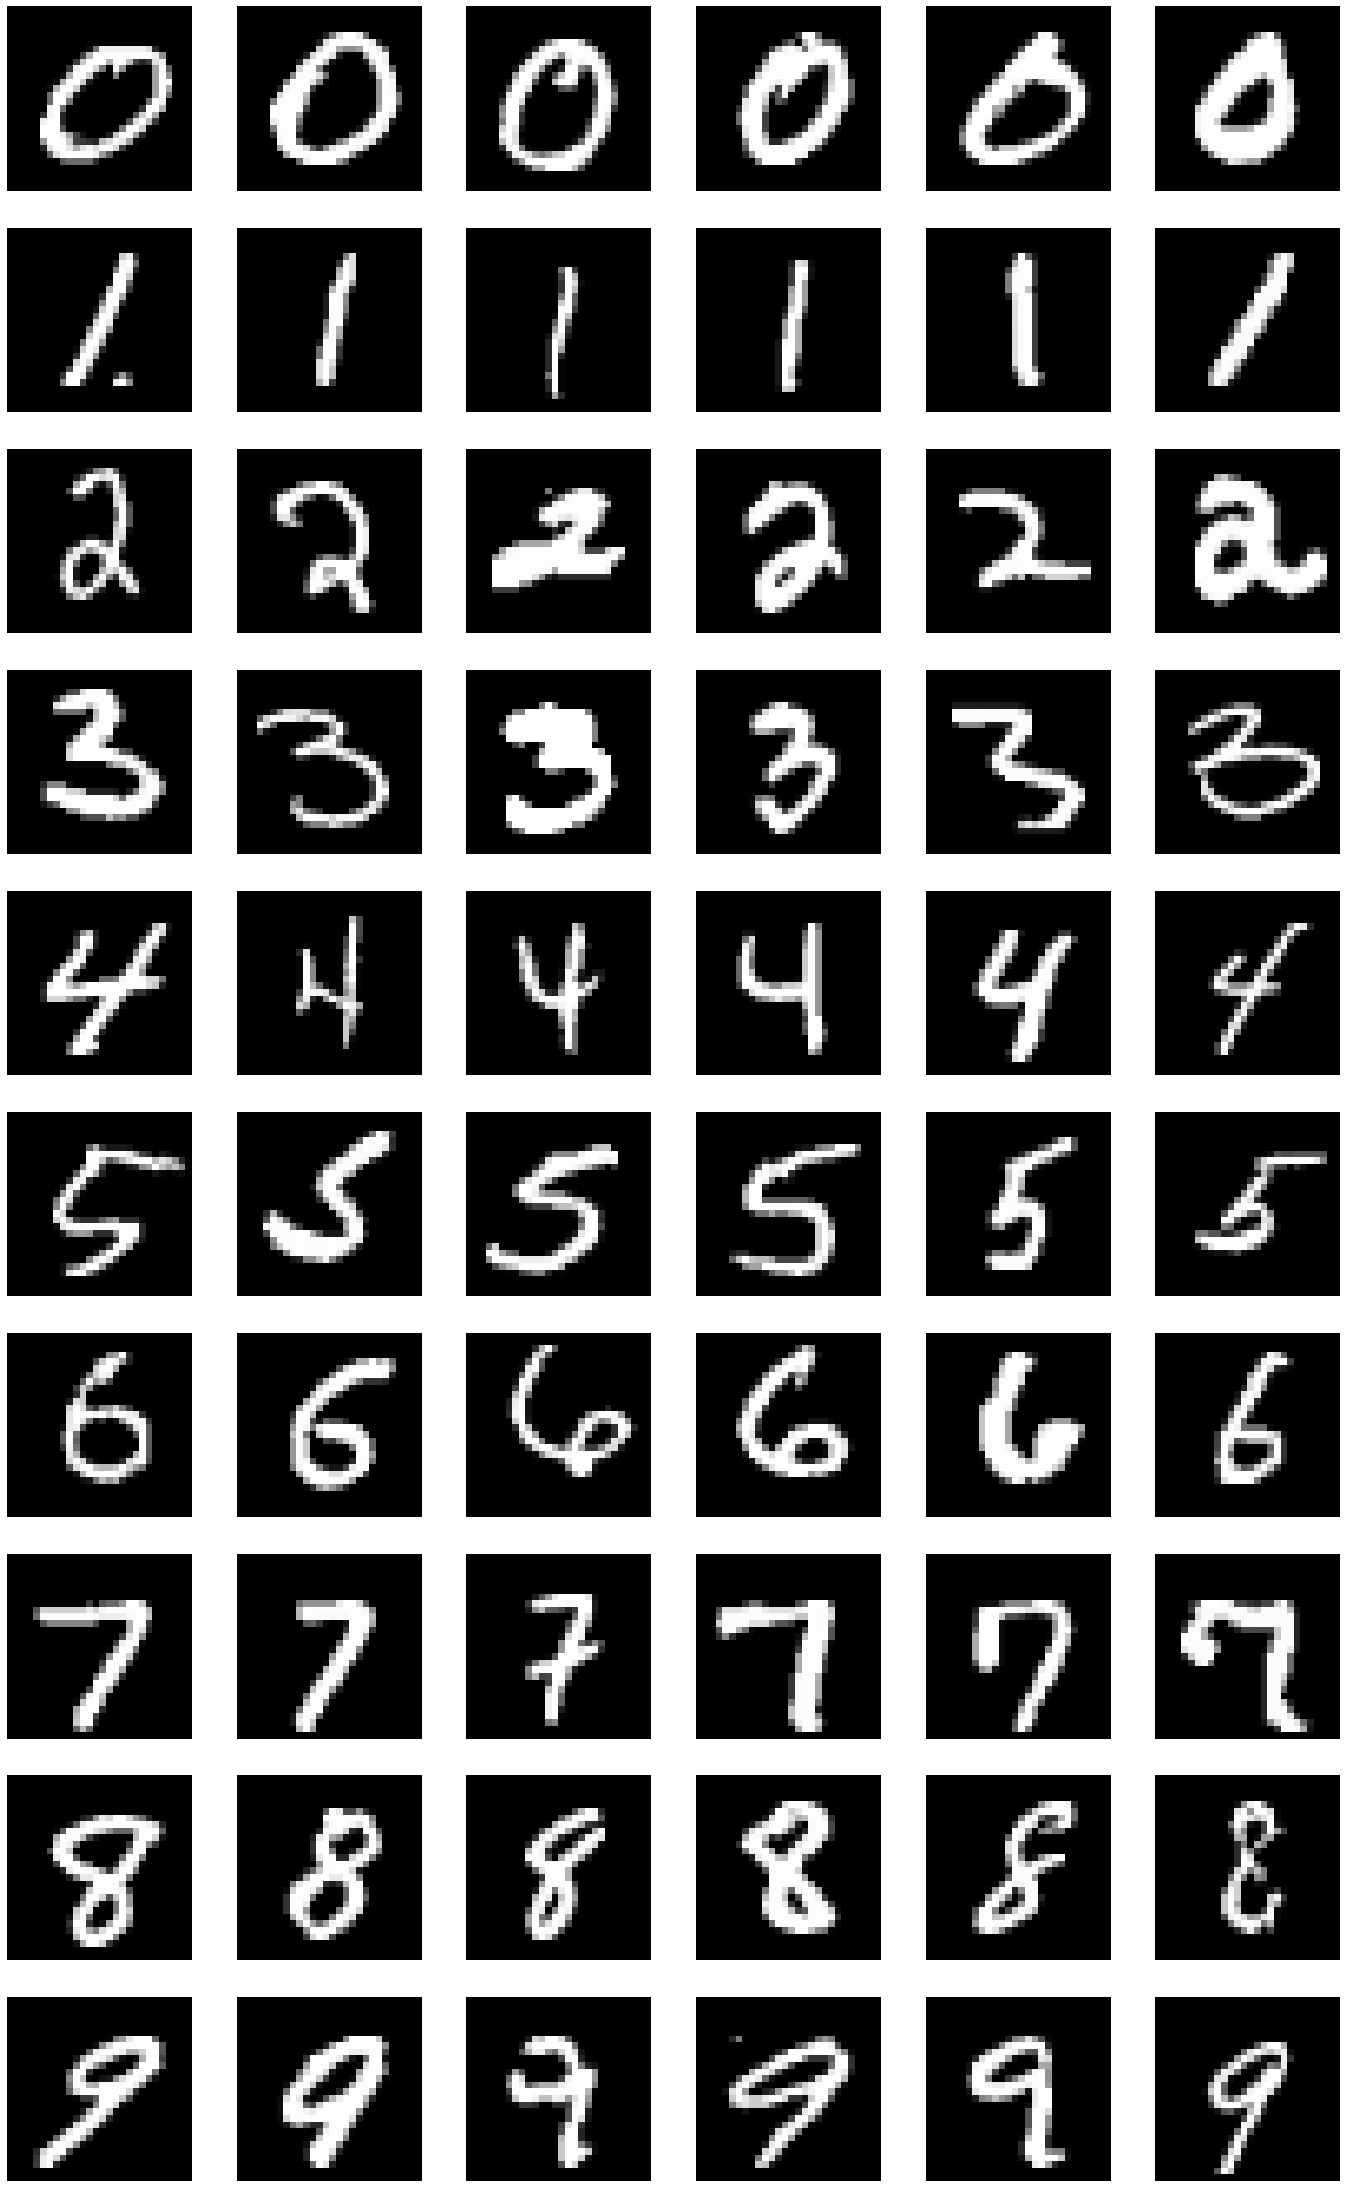

In [15]:
display_classes(X_tr, Y_tr, shape=(28,28), num_samples=6)

In [16]:
# Lets checkout the first 10 target labels in our training data
Y_tr[:10]

array([[0],
       [5],
       [4],
       [1],
       [2],
       [5],
       [4],
       [6],
       [6],
       [8]], dtype=uint8)

Before we begin working on programming, lets also see the distribution of classes in the training dataset.

In [17]:
# Works with numpy 1.9 
uniques, counts = np.unique(Y_tr, return_counts=True)
print(np.asarray((uniques, counts)).T)

[[   0 4434]
 [   1 5003]
 [   2 4504]
 [   3 4564]
 [   4 4425]
 [   5 4001]
 [   6 4384]
 [   7 4641]
 [   8 4378]
 [   9 4466]]


In [18]:
# Space left for some additional data analysis, before we jump into programming.


'''Unused'''



Before working on each programming task, we will make a copy of our original variables so that the original dataset is preserved.

|Context | Training Inputs | Training Labels | Validation Inputs | Validation Labels |
|--------|----------------|----------------|----------------|----------------|
|Original| X_tr| Y_tr| X_val| Y_val |
|Perceptron| XP_tr | YP_tr | XP_val| YP_val|
|Naive Bayes| XN_tr | YN_tr | XN_val | YN_val|
|Logistic Regression | XL_tr | YL_tr | XL_val | YL_val|


In [19]:
# Lets just checkout the code for copy_dataset function we will be using.

from itcs4156.util.data import copy_dataset
print(inspect.getsource(copy_dataset))

def copy_dataset(X_tr, Y_tr, X_val, Y_val):    
    return copy(X_tr), copy(Y_tr), copy(X_val), copy(Y_val)



In [20]:
# Additionally lets define a utility function to see our classification performance

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

def my_classification_report(targets, predictions):
    print(classification_report(targets, predictions))
    labels = np.unique(targets)
    cm = confusion_matrix(targets, predictions, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns = labels)
    c = 1.5
    k = len(labels) * c
    plt.figure(figsize=(k+c, k))
    sn.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    
    plt.show()

# Binary Classification with Perceptron

In this first task, we will be training a binary classifier using our perceptron algorithm to determine if the input image is 0 or 1. That is we will be using only a subset of our training dataset (ignoring the classes > 1).

In [21]:
# First lets get a copy the dataset

XP_tr, YP_tr, XP_val, YP_val = copy_dataset(X_tr, Y_tr, X_val, Y_val)

In [22]:
# Next, we have written a utility function to get the data 
# corresponding to the required classes. 

from itcs4156.util.data import filter_data
print(inspect.getsource(filter_data))

def filter_data(images, labels, classes=[0,1]):
    idx = []
    for i, label in enumerate(labels):
        if label in classes:
            idx.append(i)
    f_images = images[idx]
    f_labels = labels[idx]
    return f_images, f_labels



In [23]:
XP_tr, YP_tr = filter_data(XP_tr, YP_tr, classes=[0,1])
XP_val, YP_val = filter_data(XP_val, YP_val, classes=[0,1])

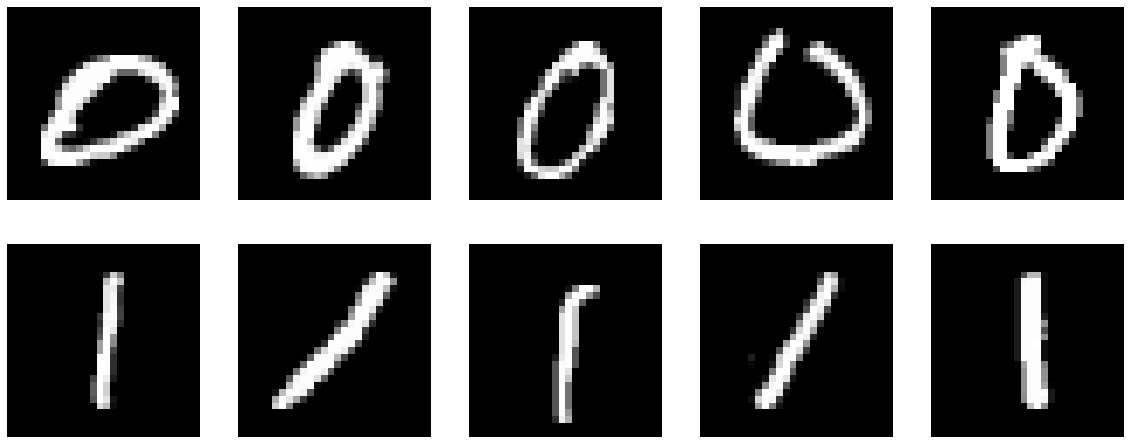

In [24]:
# lets see what it looks like
display_classes(XP_tr, YP_tr)

Great! We have filtered our dataset just to have images of class 0 and 1. Now its time to begin programming our Perceptron.

## ==== TODO - 1 ====
Open the **Perceptron.py** file provided with this assignment and write the code for the four functions in the file.

In [25]:
from itcs4156.assignments.classification.Perceptron import Perceptron

In [26]:
"""
Space left for data analysis. You can play with the dataset and any transformations 
you might want to do on your dataset here. Once done, you can remove that code from here 
and paste it in fit_transform() method, which is actually called before training your 
model on (XP_tr, YP_tr).
""" 
# copying dataset to temporary variables.
temp_X_tr, temp_Y_tr, temp_X_val, temp_Y_val = copy_dataset(XP_tr, YP_tr, XP_val, YP_val) 

temp_X_tr = np.where(XP_tr > 200, 1, 0)

In [27]:
# 1. Training 

alpha = 1  # Set your learning rate
epochs = 1  # Set your training epochs
model = Perceptron(alpha, epochs)
model.train(XP_tr, YP_tr)

In [28]:
# 2. Prediction

YP_tr_pred = model.predict(XP_tr)
YP_val_pred = model.predict(XP_val)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4434
           1       0.96      0.99      0.98      5003

    accuracy                           0.98      9437
   macro avg       0.98      0.97      0.98      9437
weighted avg       0.98      0.98      0.98      9437



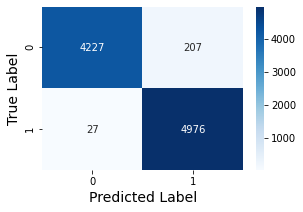

In [29]:
# 3. Training Performance

my_classification_report(YP_tr, YP_tr_pred)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1126
           1       0.97      1.00      0.98      1274

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400



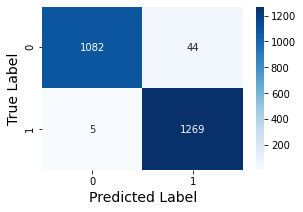

In [30]:
# 4. Validation Performance

my_classification_report(YP_val, YP_val_pred)

In [31]:
# 5. TODO - Discussion

# Analyze and discuss your results, the choices you made for the parameters, 
# and the performance of the classifier. Explain why it's is working well or otherwise.
'''
I chose to binarize the pixel values over 50 to 1, and all values 50 and under to 0.

The performance of the classifier is quite good. The accuracy could be increased by tweaking the train method
and adding batching/pocket support in order to utilize a higher epoch value.
However as execution time seems to be what we are ranked on - that is what I prioitized reducing


'''



# Multi-Class Classification with Naive Bayes

In this second task, we will be implementing the Naive Bayes algorithm to classify an input image from 0 to 9. That is, we will be using our complete dataset for this purpose.

In [32]:
# First lets create our dataset

XN_tr, YN_tr, XN_val, YN_val = copy_dataset(X_tr, Y_tr, X_val, Y_val)

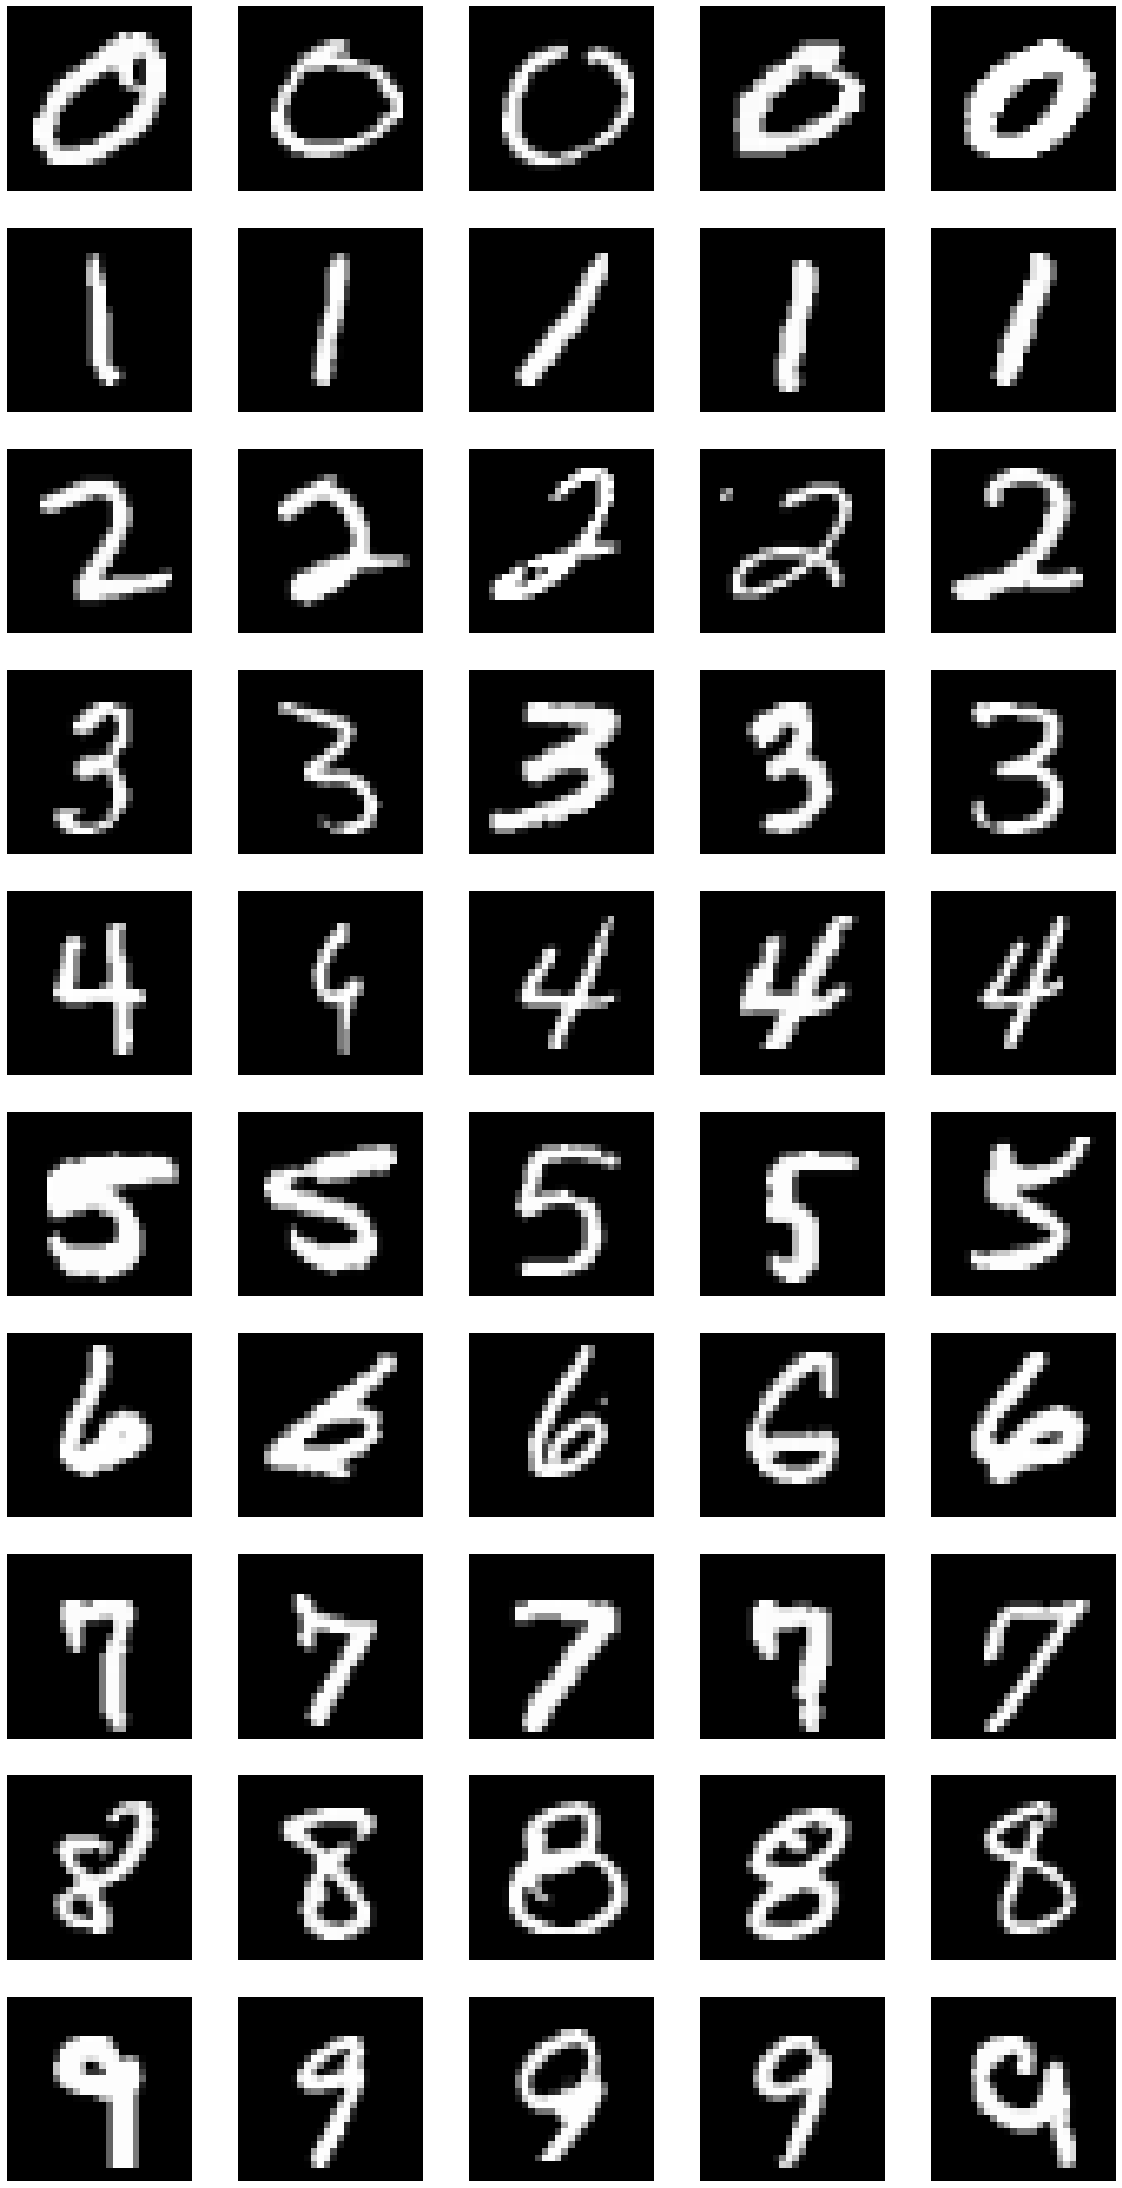

In [33]:
"""
 Space left for data analysis. You can play with the dataset and any transformations 
 you might want to do on your dataset here. Once done, you can remove that code from here 
 and paste it in fit_transform() method, which is actually called before training your 
 model on (XN_tr, YN_tr).
""" 

# copying dataset to temporary variables.
temp_X_tr, temp_Y_tr, temp_X_val, temp_Y_val = copy_dataset(XN_tr, YN_tr, XN_val, YN_val) 


"""
 One such transformation is given here as an example.
 Since we know that our data is highly sparse i.e each feature's range is 0-255.
 Therefore, it's highly unlikely that we will find each feature containing all values 
 in the range. This will result in zero probabilities for eg. P(xi == 114 | y == 2) reads 
 probablity that ith pixel of input x will have value 114 given that it input belongs to 
 class 2. In orfer to reduce the sparsity, we can binarize our data so that each pixel 
 either takes a 0 value or 1 value i.e reduce the range of features.
"""

def binarize(images, threshold=50):
    """
        Assigns a value of 1 to any pixel greater than the threshold and 0 otherwise. 
    """
    new_images = images > threshold
    return np.uint8(new_images)

# Lets see how the images look like after this transformation.
display_classes(temp_X_tr, Y_tr, shape=(28,28))

## ==== TODO - 2 ====

Open the **NaiveBayes.py** file and write the code for the four functions in the file.

In [34]:
from itcs4156.assignments.classification.NaiveBayes import NaiveBayes

In [669]:
# 1. Training

model = NaiveBayes()
model.train(XN_tr, YN_tr)

In [670]:
# 2. Prediction

YN_tr_pred = model.predict(XN_tr)
YN_val_pred = model.predict(XN_val)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      4434
           1       0.96      0.87      0.91      5003
           2       0.83      0.86      0.84      4504
           3       0.84      0.73      0.78      4564
           4       0.72      0.90      0.80      4425
           5       0.60      0.78      0.67      4001
           6       0.96      0.83      0.89      4384
           7       0.87      0.88      0.87      4641
           8       0.84      0.61      0.71      4378
           9       0.78      0.72      0.74      4466

    accuracy                           0.81     44800
   macro avg       0.82      0.81      0.81     44800
weighted avg       0.82      0.81      0.81     44800



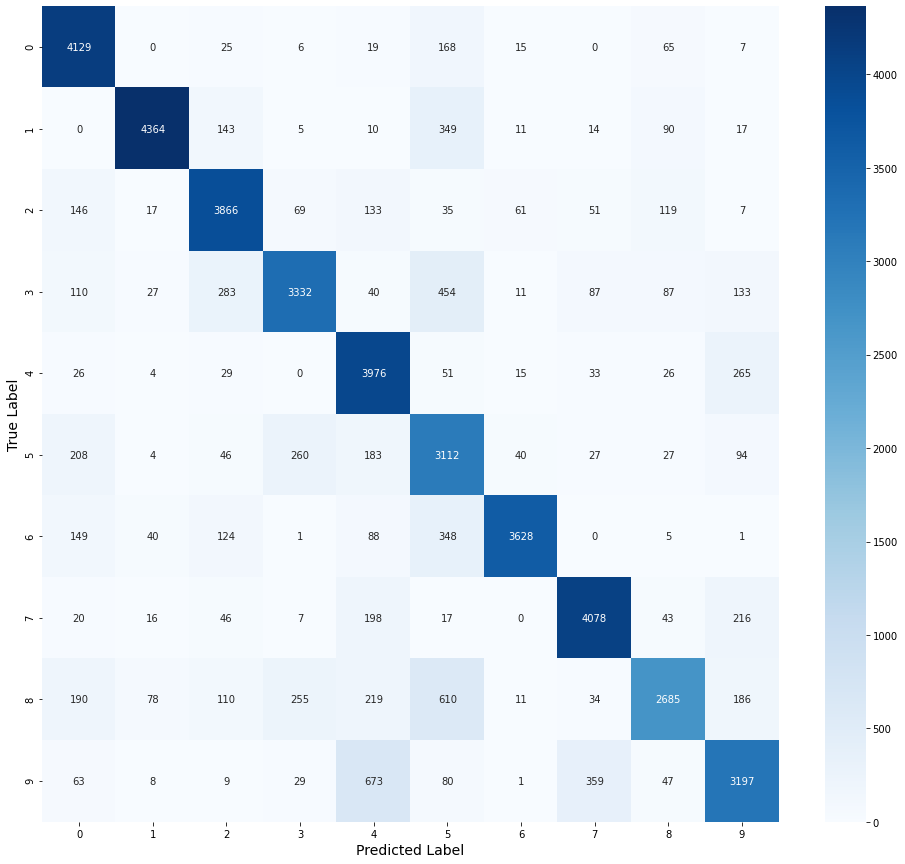

In [671]:
# 3. Training Performance

my_classification_report(YN_tr, YN_tr_pred)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1126
           1       0.97      0.84      0.90      1274
           2       0.80      0.83      0.82      1106
           3       0.79      0.75      0.77      1144
           4       0.76      0.82      0.79      1104
           5       0.67      0.75      0.71      1039
           6       0.94      0.82      0.88      1096
           7       0.91      0.84      0.88      1149
           8       0.77      0.65      0.71      1090
           9       0.67      0.80      0.73      1072

    accuracy                           0.80     11200
   macro avg       0.81      0.80      0.80     11200
weighted avg       0.81      0.80      0.80     11200



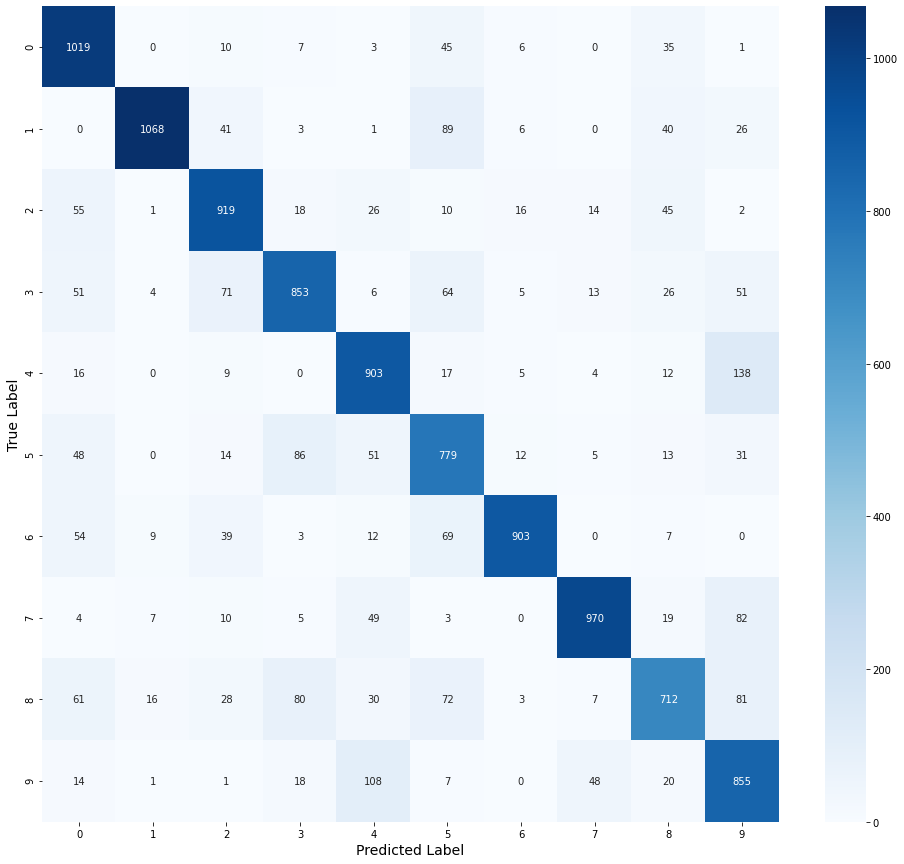

In [169]:
# 4. Validation Performance

my_classification_report(YN_val, YN_val_pred)

In [35]:
# 5. TODO - Discussion

# Analyze and discuss your results, the choices you made for the parameters, 
# and the performance of the classifier. Explain why it's is working well or otherwise.
'''

I similarly chose to binarize the pixel values again.

As execution time is the priority in the rankings, I chose an approach of Naive Bayes implementation that did not
have the greatest possible accuracy, but the best execution time for an accuracy of 80%. 


'''




# Multi-Class Classification with Logistic Regression

In this third task, we will be using logistic regression for performing multi-class classification i.e, classifying the input image from 0 to 9.

In [171]:
# First, lets create our dataset

XL_tr, YL_tr, XL_val, YL_val = copy_dataset(X_tr, Y_tr, X_val, Y_val)

In [172]:
"""
 Space left for data analysis. You can play with the dataset and any transformations 
 you might want to do on your dataset here. Once done, you can remove that code from here 
 and paste it in fit_transform() method, which is actually called before training your 
 model on (XL_tr, YL_tr).
""" 

# copying dataset to temporary variables.
temp_X_tr, temp_Y_tr, temp_X_val, temp_Y_val = copy_dataset(XL_tr, YL_tr, XL_val, YL_val) 






## ==== TODO - 3 ====


Open the **LogisticRegression.py** file and implement the four functions in it.

In [377]:
from itcs4156.assignments.classification.LogisticRegression import LogisticRegression

In [641]:
# 1. Training
#git 
alpha = .5 # Set learning rate
epochs = 17 # Set Epochs
model = LogisticRegression(alpha, epochs)
model.train(XL_tr, YL_tr)

In [663]:
# 2. Prediction

YL_tr_pred = model.predict(XL_tr)
YL_val_pred = model.predict(XL_val)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4434
           1       0.86      0.93      0.89      5003
           2       0.84      0.78      0.81      4504
           3       0.73      0.75      0.74      4564
           4       0.80      0.81      0.81      4425
           5       0.70      0.62      0.66      4001
           6       0.82      0.92      0.87      4384
           7       0.92      0.80      0.85      4641
           8       0.81      0.73      0.77      4378
           9       0.68      0.80      0.73      4466

    accuracy                           0.81     44800
   macro avg       0.81      0.80      0.80     44800
weighted avg       0.81      0.81      0.80     44800



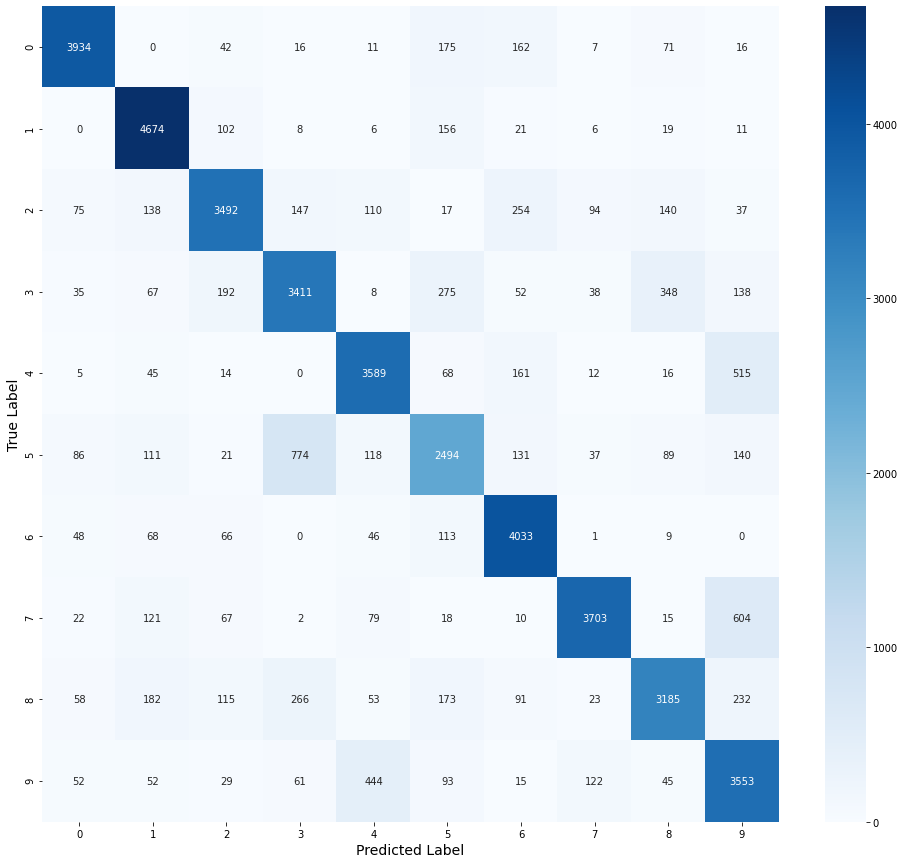

In [664]:
# 3. Training Performance

my_classification_report(YL_tr, YL_tr_pred)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1126
           1       0.80      0.96      0.87      1274
           2       0.86      0.78      0.82      1106
           3       0.70      0.83      0.76      1144
           4       0.80      0.82      0.81      1104
           5       0.75      0.59      0.66      1039
           6       0.81      0.90      0.85      1096
           7       0.77      0.90      0.83      1149
           8       0.88      0.59      0.71      1090
           9       0.77      0.67      0.71      1072

    accuracy                           0.80     11200
   macro avg       0.80      0.79      0.79     11200
weighted avg       0.80      0.80      0.79     11200



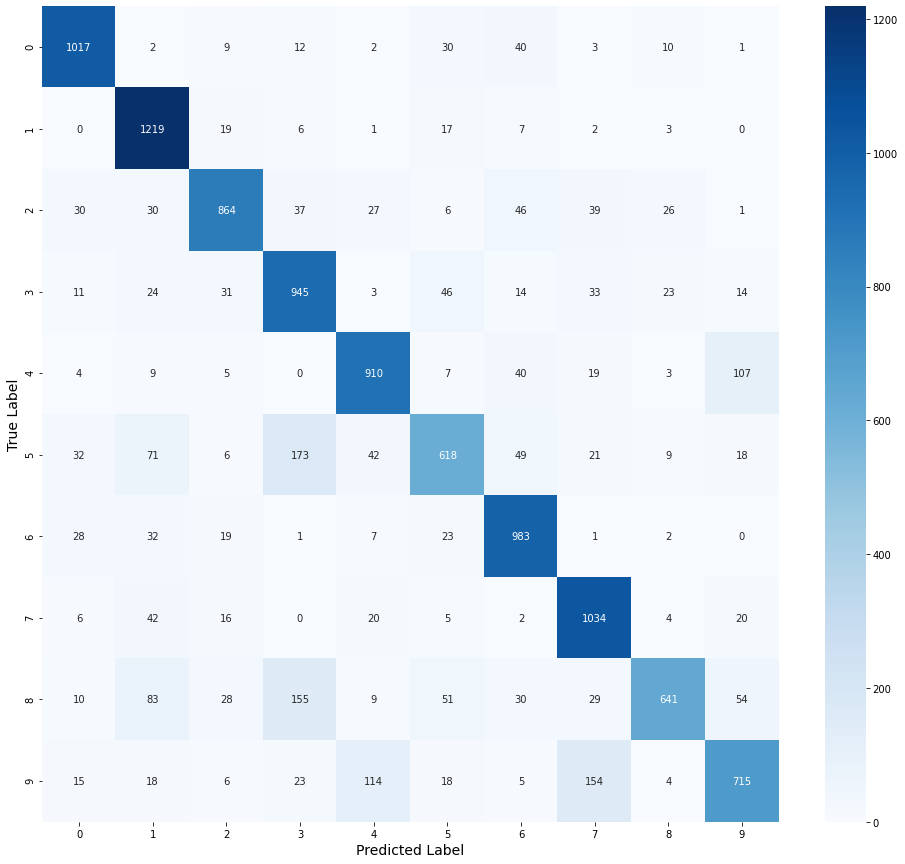

In [631]:
# 4. Validation Performance

my_classification_report(YL_val, YL_val_pred)

In [ ]:
# 5. TODO - Discussion

# Analyze and discuss your results, the choices you made for the parameters, 
# and the performance of the classifier. Explain why it's is working well or otherwise.
'''

As with the other classification techniques, I binarized the pixel values. 

A small epoch value was chosen in order to reduce execution time. Overall for these algorithms, I beleive a 
better choice of features / image manipulation would have produced stronger results. 


'''





# Putting it all together!

Once you have finished all the above three **TODOs** and you are satisfied with the  results you are getting, it is time evaluate all your code together and make it ready for submission.

### ==== TODO - 4 ====

Open the **train.py** given with this assignment and set the appropriate parameters (features, alpha, degree) for your models in the given functions.

## Final Testing

Next, we will evaluate all your models on the validation split and give you a score based on accuracy.

In [666]:
from itcs4156.assignments.classification.evaluate import eval
eval()

Skipping download. File already exists: c:\users\josh\machine\assign\itcs4156\datasets\data\MNIST\train.zip

Unzipping: c:\users\josh\machine\assign\itcs4156\datasets\data\MNIST\train.zip

Skipping download. File already exists: c:\users\josh\machine\assign\itcs4156\datasets\data\MNIST\val.zip

Unzipping: c:\users\josh\machine\assign\itcs4156\datasets\data\MNIST\val.zip

Loading dataset..
Done!
Initializing Perceptron with alpha = 1 and epochs = 1
Training:  Perceptron
Evaluating:  Perceptron
Evaluating:  Perceptron
Elapsed time: 0.3309 seconds
Accuracy: Train = 0.9752039843170499, Val = 0.9795833333333334
Score: 20.000000

Initializing NaiveBayes
Training:  NaiveBayes
Evaluating:  NaiveBayes
Evaluating:  NaiveBayes
Elapsed time: 11.8929 seconds
Accuracy: Train = 0.8021875, Val = 0.8023214285714285
Score: 20.000000

Initializing LogisticRegression with alpha = 0.5 and epochs = 20
Training:  LogisticRegression
Evaluating:  LogisticRegression
Evaluating:  LogisticRegression
Elapsed time:

# Grading 


The final grading will be done on **TEST** dataset when you submit this assignment on **Autolab**. 

Points | Description
--|--------:
20 | Perceptron
20 | Naive Bayes
40 | Logistic Regression
10 | Notebook: Analysis and Discussion
10 | $\frac{(N - R + 1)}{N} \times 10$   

The last 10 points will be calculated based on your rank (R) among all students (N). The rank will be computed based on your scores and accuracy. It will be visible to you (and anonymous to others) in leaderboard on Autolab as you make submissions.  

### Scoring scheme for perceptron based on accuracy

In [156]:
from itcs4156.assignments.classification.evaluate import score_perceptron
print(inspect.getsource(score_perceptron))

def score_perceptron(acc, max_score):
    score_percent = 0
    if acc >= 0.8:
        score_percent = 100
    elif acc >= 0.75:
        score_percent = 90
    elif acc >= 0.70:
        score_percent = 80
    elif acc >= 0.65:
        score_percent = 70
    elif acc >= 0.60:
        score_percent = 60
    elif acc >= 0.55:
        score_percent = 50
    else:
        score_percent = 40
    score = max_score * score_percent / 100.0 
    return score



### Scoring scheme for Naive Bayes and Logistic Regression

In [1304]:
from itcs4156.assignments.classification.evaluate import score
print(inspect.getsource(score))

def score(acc, max_score):
    score_percent = 0
    if acc >= 0.80:
        score_percent = 100
    elif acc >= 0.70:
        score_percent = 90
    elif acc >= 0.60:
        score_percent = 80
    elif acc >= 0.50:
        score_percent = 70
    elif acc >= 0.40:
        score_percent = 60
    elif acc >= 0.30:
        score_percent = 55
    elif acc >= 0.20:
        score_percent = 50
    elif acc >= 0.15:
        score_percent = 45
    else:
        score_percent = 40
    score = max_score * score_percent / 100.0 
    return score



# Submission


```
| - itcs4156
    | - assignments
        | - classification   <----------- Zip this folder and submit on AutoLab
            | - train.py
            | - Perceptron.py
            | - NaiveBayes.py
            | - LogisticRegression.py
            | - evaluate.py
            | - __init__.py
    | - notebooks
        | - 2 - Classification.ipynb <----- Upload this file on Canvas
```